# Loading the Data

First of all, we load the different necessary packages:
- Pandas
- Matplotlib
- Seaborn
- NumPy

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Next, we load the dataset. We have added the Breast Cancer Wisconsin dataset from UCI.

In [67]:
url = 'https://raw.githubusercontent.com/Bayan2019/Data_Analytics_Technologies/main/data_2.csv'

In [68]:
cancer_df = pd.read_csv(url)

# Numerical Exploratory Data Analysis (EDA)

Get sense of the content of our DataFrame

In [69]:
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [70]:
cancer_df.shape

(569, 33)

In [71]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Drop the last 'Unnamed: 32' column.

In [73]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)

In [74]:
cancer_df.shape

(569, 32)

In [75]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [76]:
cancer_df_melted = pd.melt(cancer_df, id_vars=['id', 'diagnosis'], value_vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

In [77]:
cancer_df_melted.shape

(17070, 4)

In [78]:
cancer_df_melted.head()

id diagnosis     variable  value
0    842302         M  radius_mean  17.99
1    842517         M  radius_mean  20.57
2  84300903         M  radius_mean  19.69
3  84348301         M  radius_mean  11.42
4  84358402         M  radius_mean  20.29

In [79]:
cancer_df.index

RangeIndex(start=0, stop=569, step=1)

In [80]:
len(cancer_df.id.unique())

569

In [81]:
cancer_df.set_index('id', inplace=True)

In [82]:
cancer_df.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

In [83]:
cancer_df.shape

(569, 31)

In [84]:
cancer_df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

# Visual EDA


Set the color palette

In [85]:
hue_colors1 = {'M': 'red', 'B': 'blue'}
hue_colors2 = ['red', 'blue']

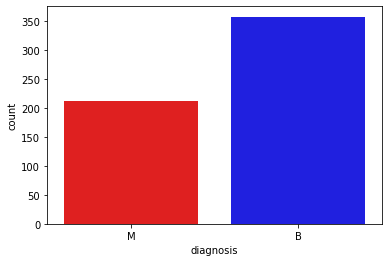

In [86]:
sns.countplot(x='diagnosis', data=cancer_df, palette=hue_colors2)

We can plot a heatmap (some specific features were choosen for the purpose of the visualization)

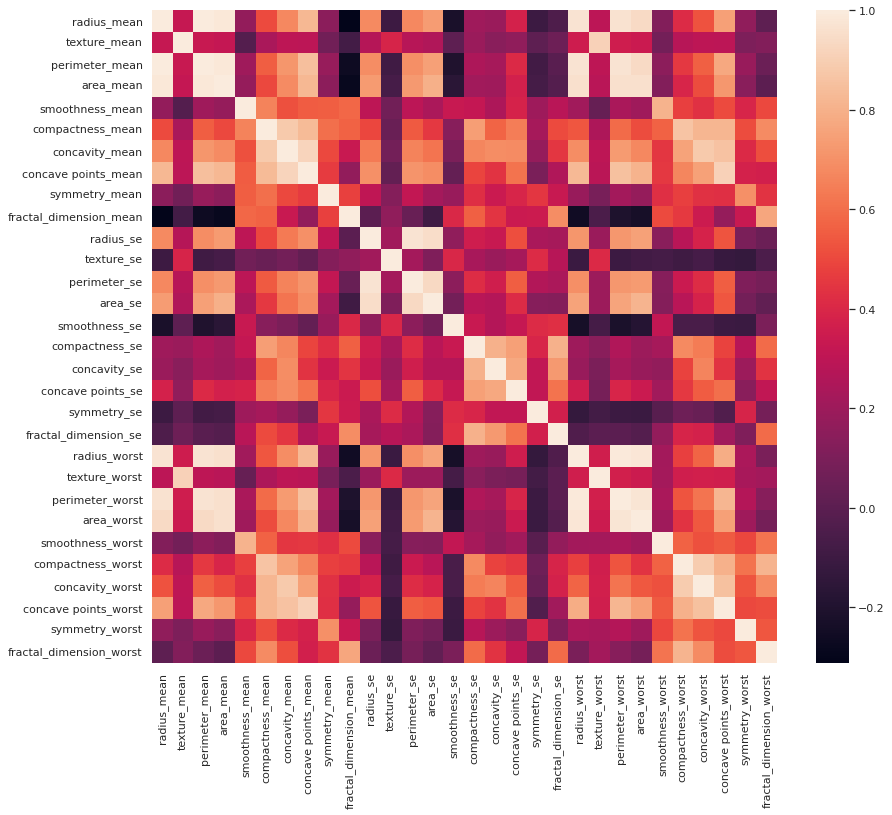

In [87]:
sns.set(rc = {'figure.figsize':(14, 12)})
sns.heatmap(cancer_df.corr(), xticklabels=1, yticklabels=1)

In [88]:
corr_vars1 = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
corr_vars2 = ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']

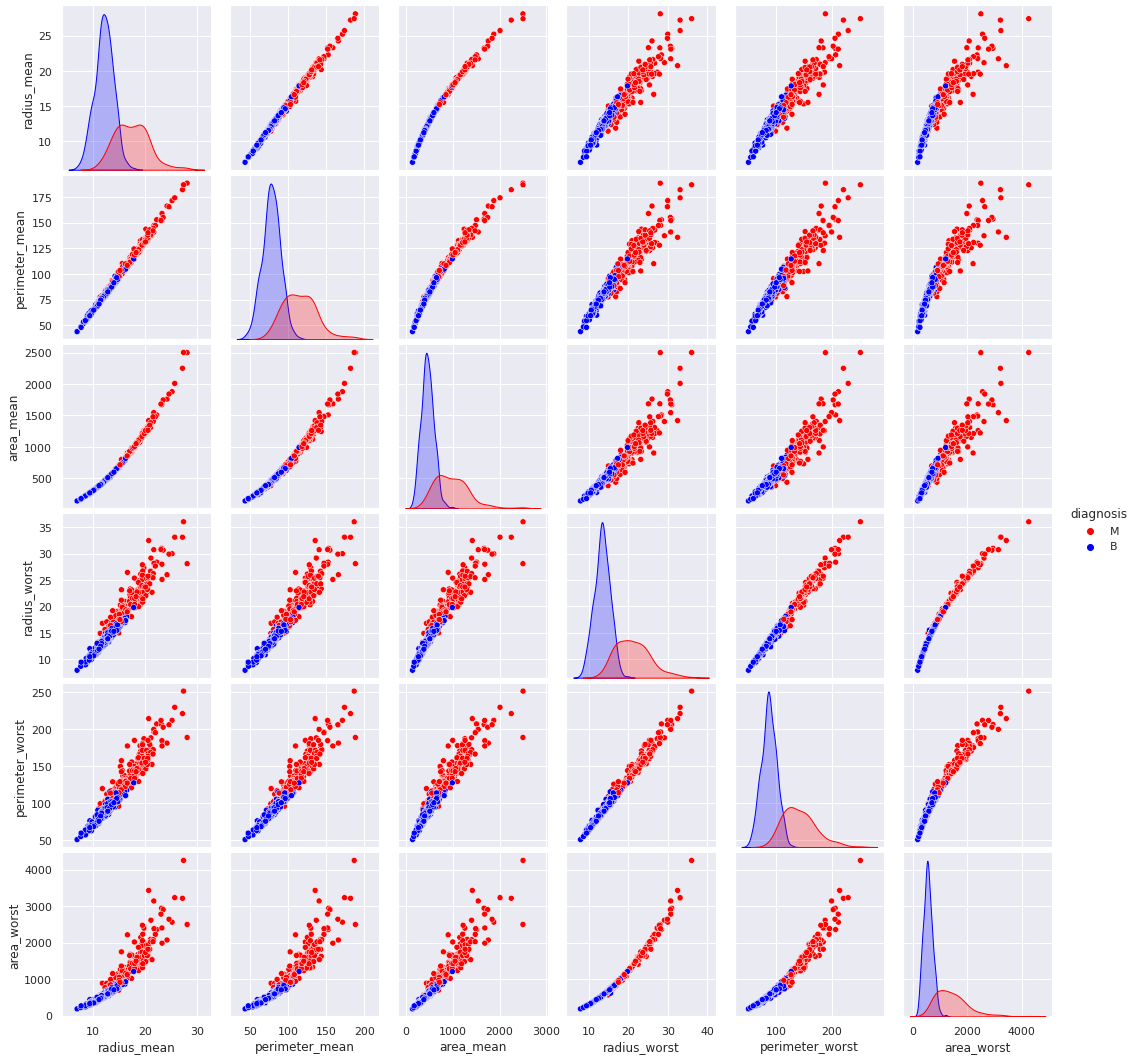

In [89]:
sns.pairplot(cancer_df, kind='scatter', vars=corr_vars2, palette=hue_colors1, hue='diagnosis')

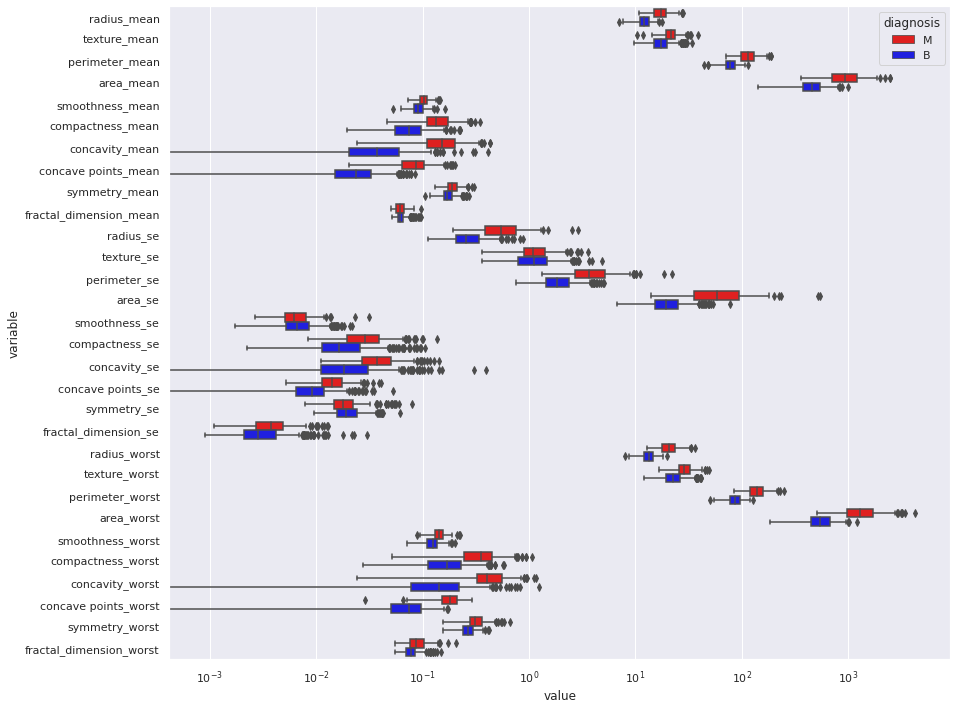

In [90]:
sns.boxplot(data=cancer_df_melted, y='variable', x='value', hue='diagnosis', palette=hue_colors2)
plt.xscale('log')
#plt.xlabel('log(value)')

## Swarmplot

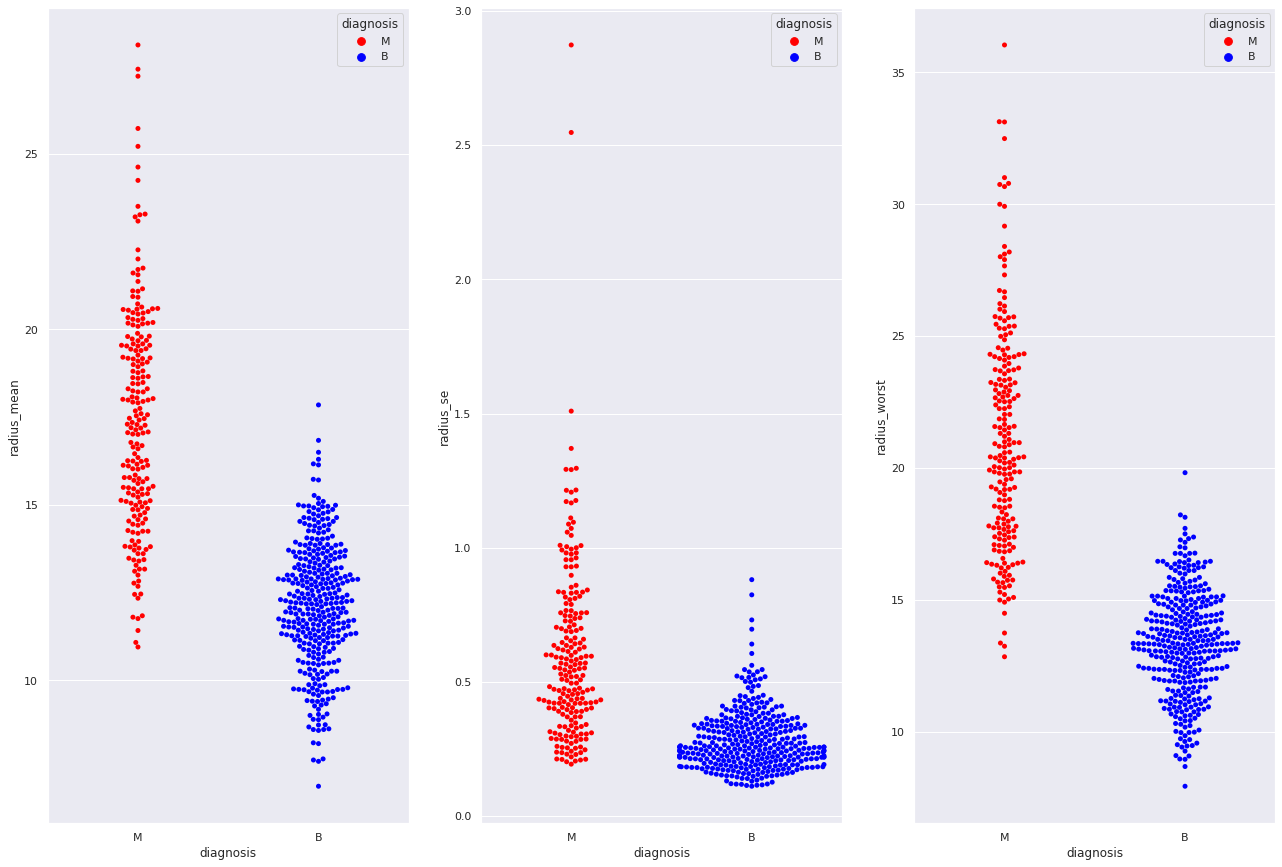

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='radius_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='radius_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='radius_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

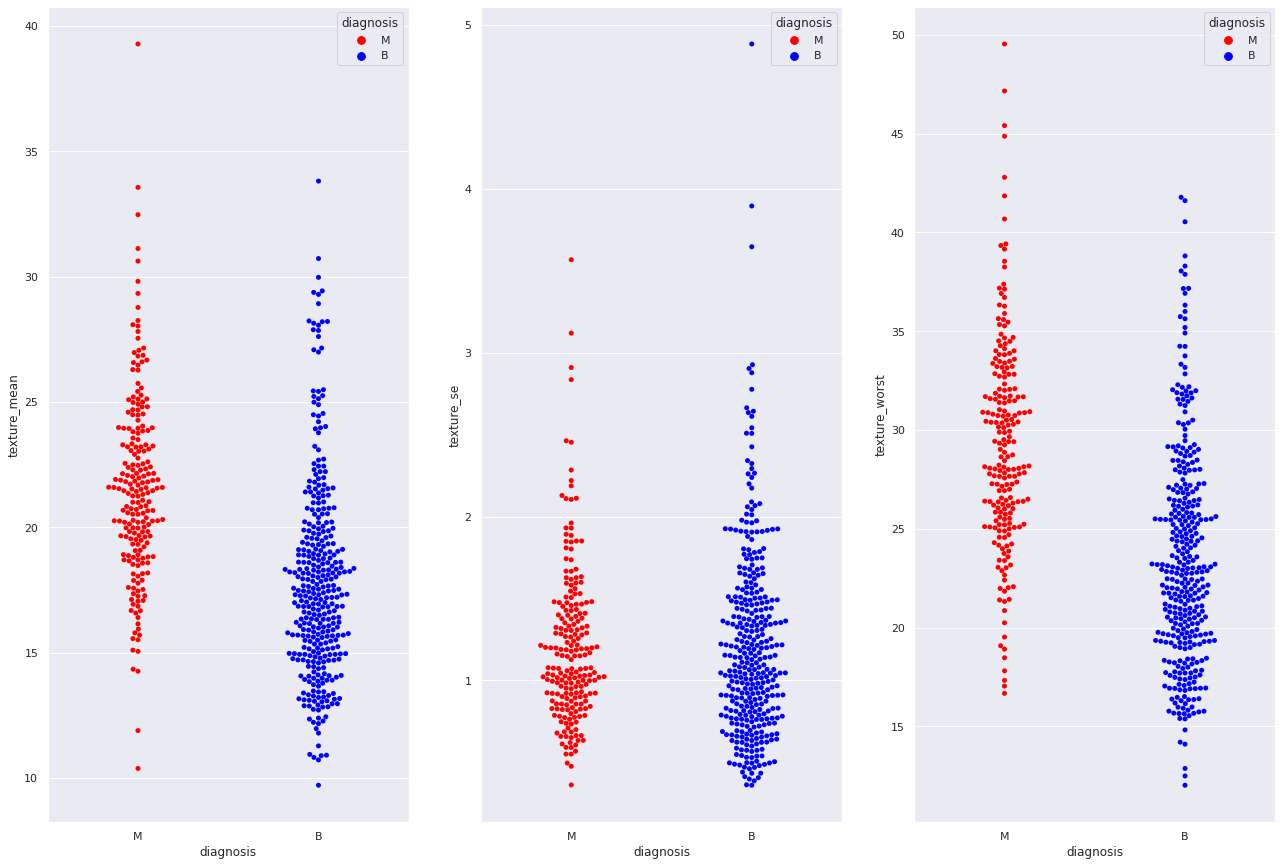

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='texture_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='texture_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='texture_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


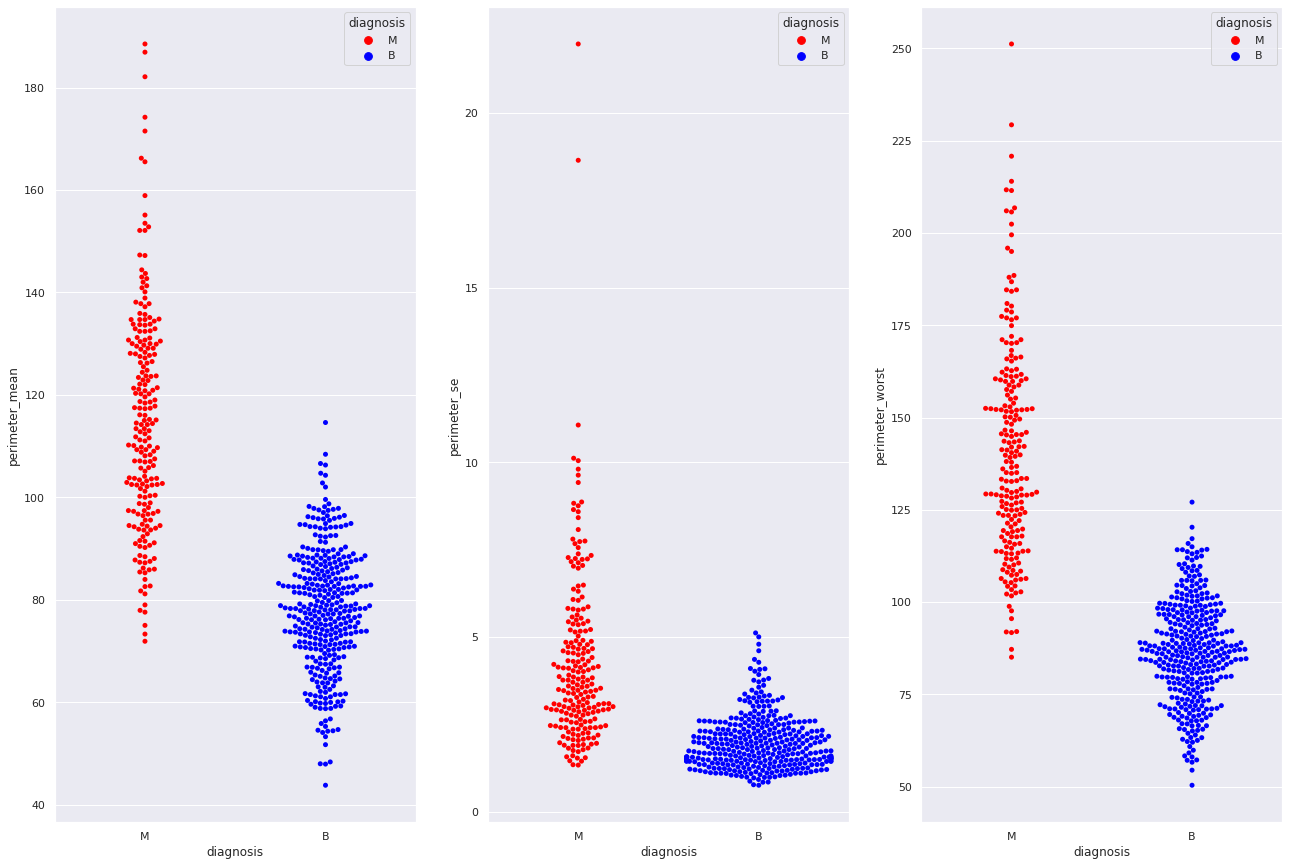

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='perimeter_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='perimeter_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='perimeter_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


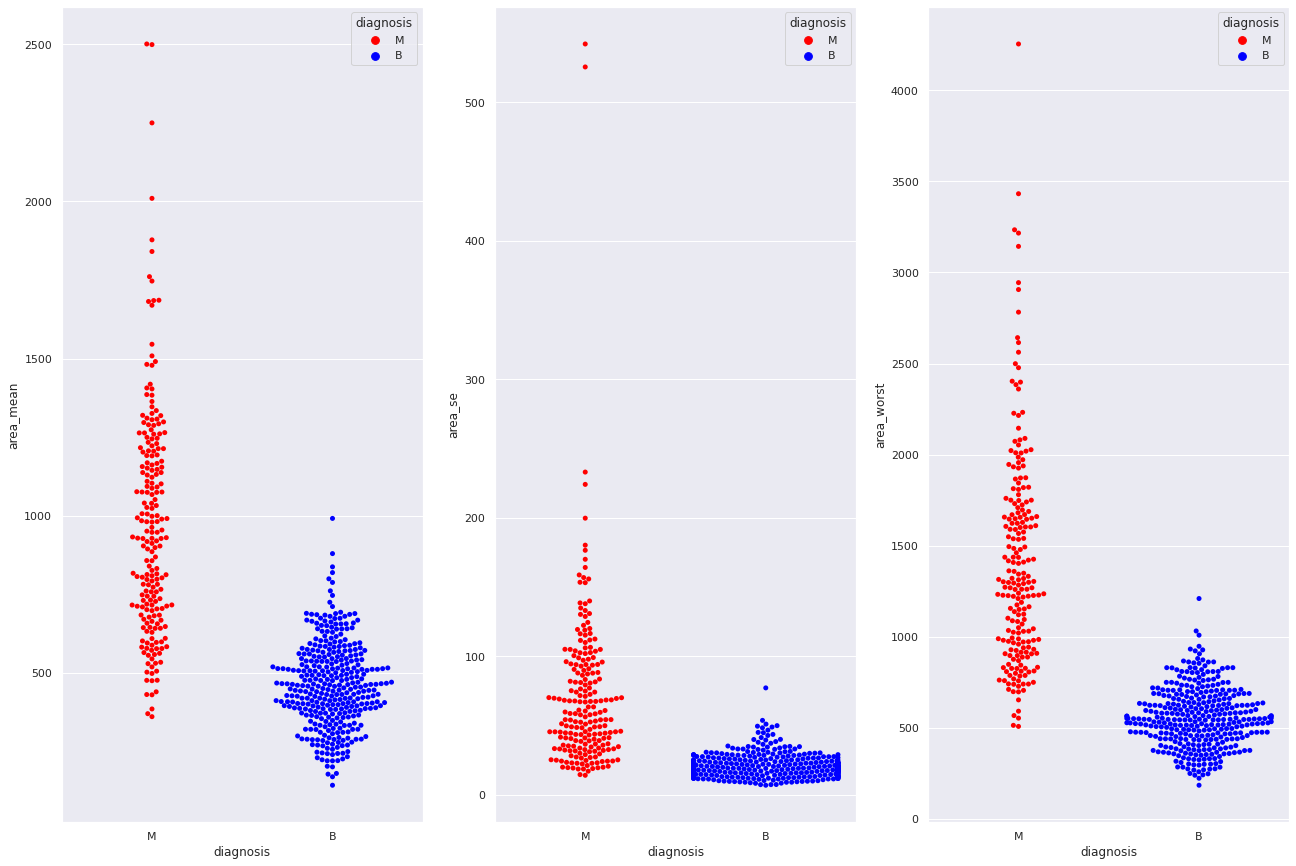

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='area_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='area_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='area_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

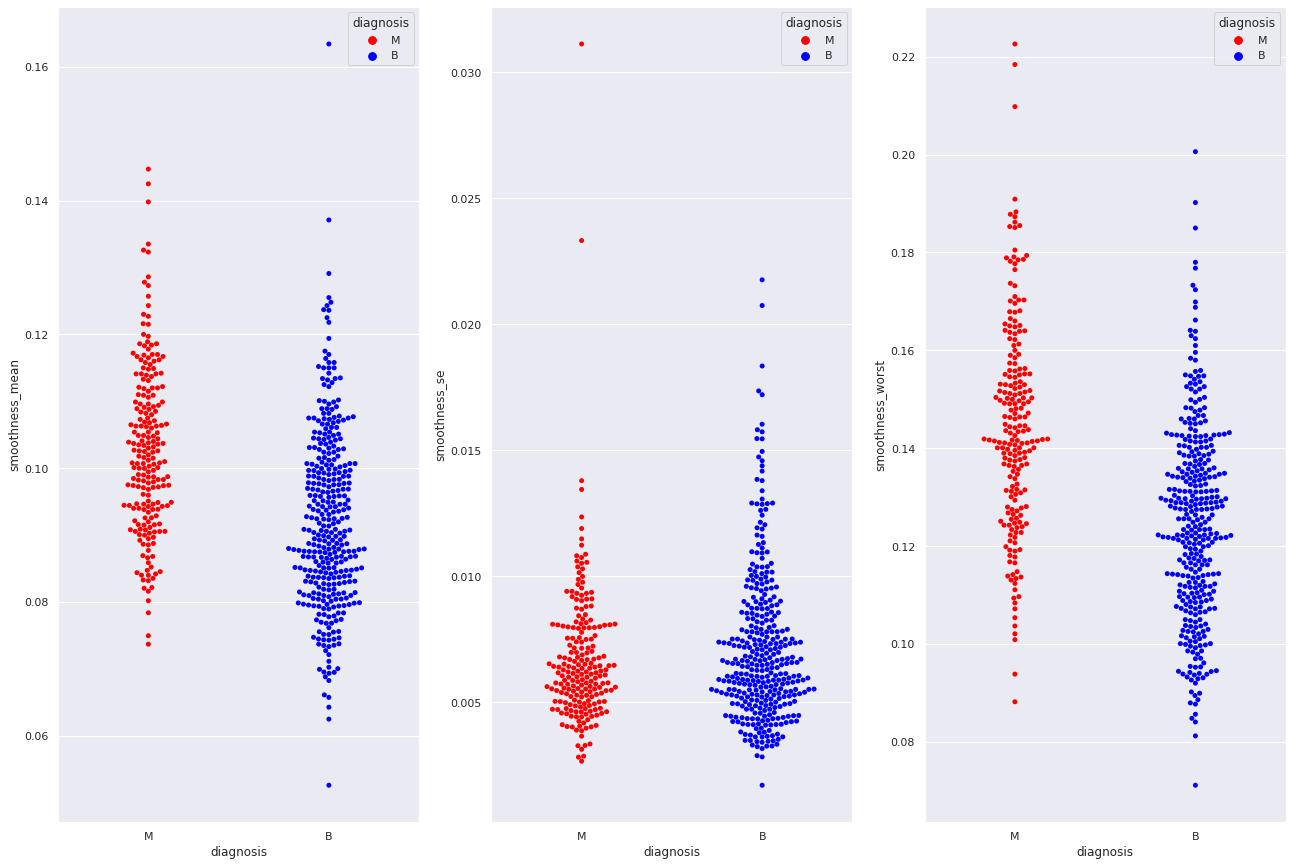

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='smoothness_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='smoothness_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='smoothness_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

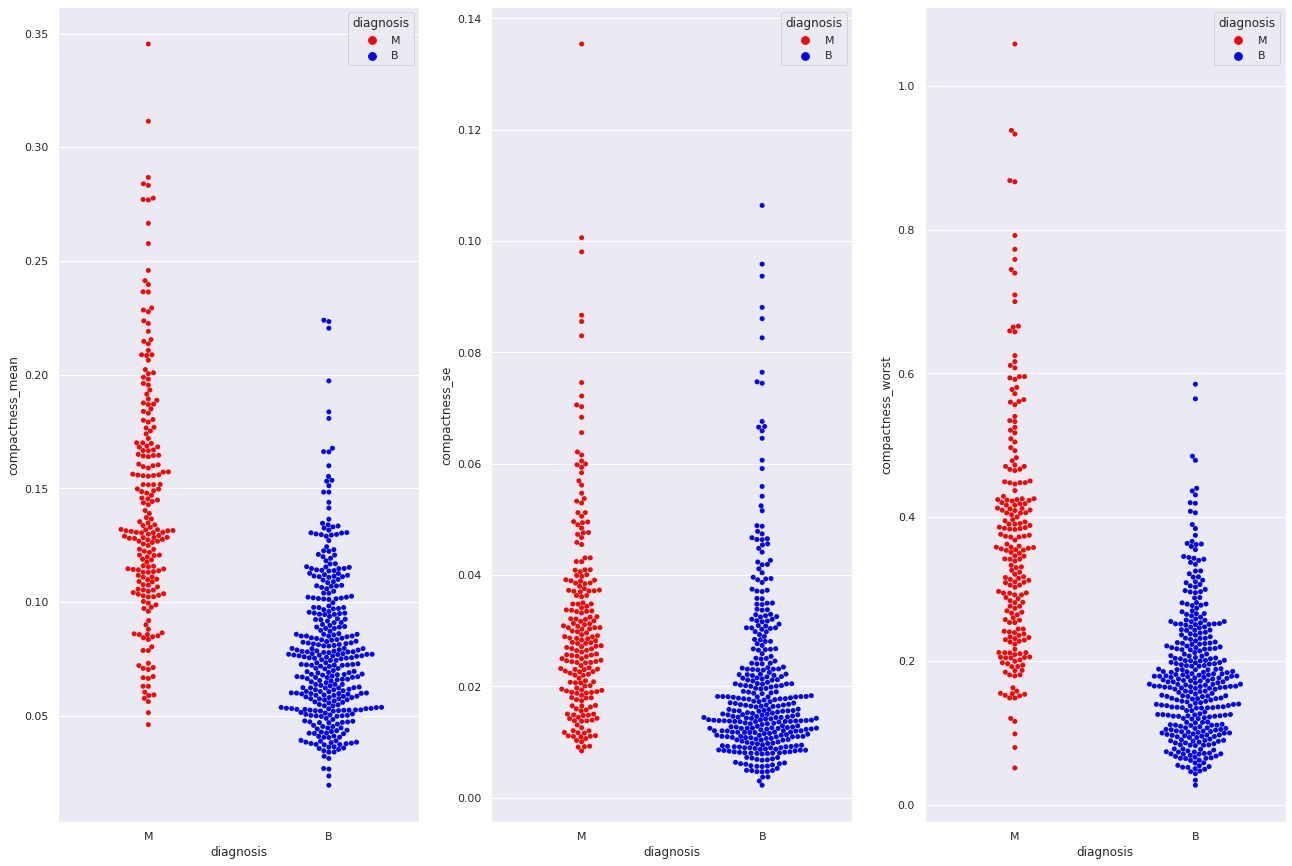

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='compactness_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='compactness_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='compactness_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


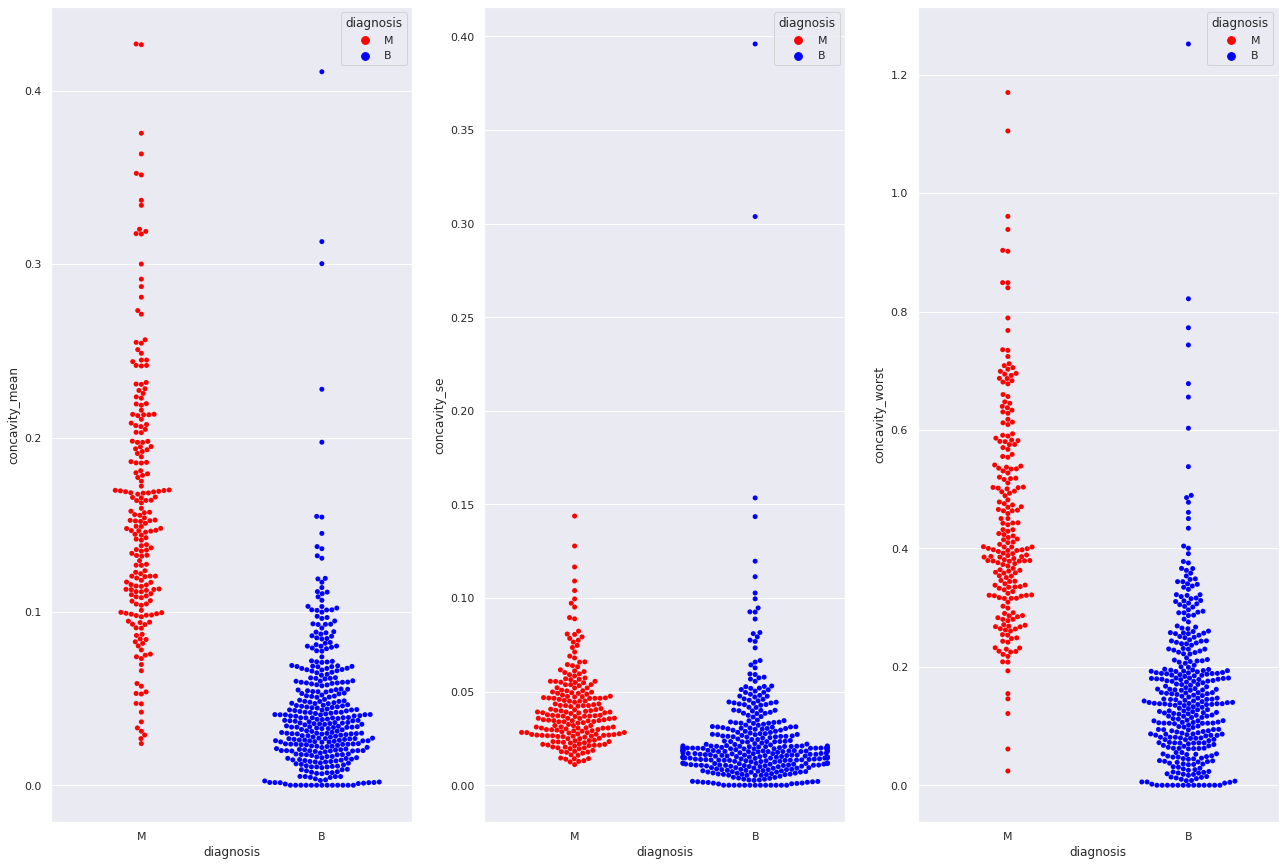

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='concavity_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='concavity_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='concavity_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

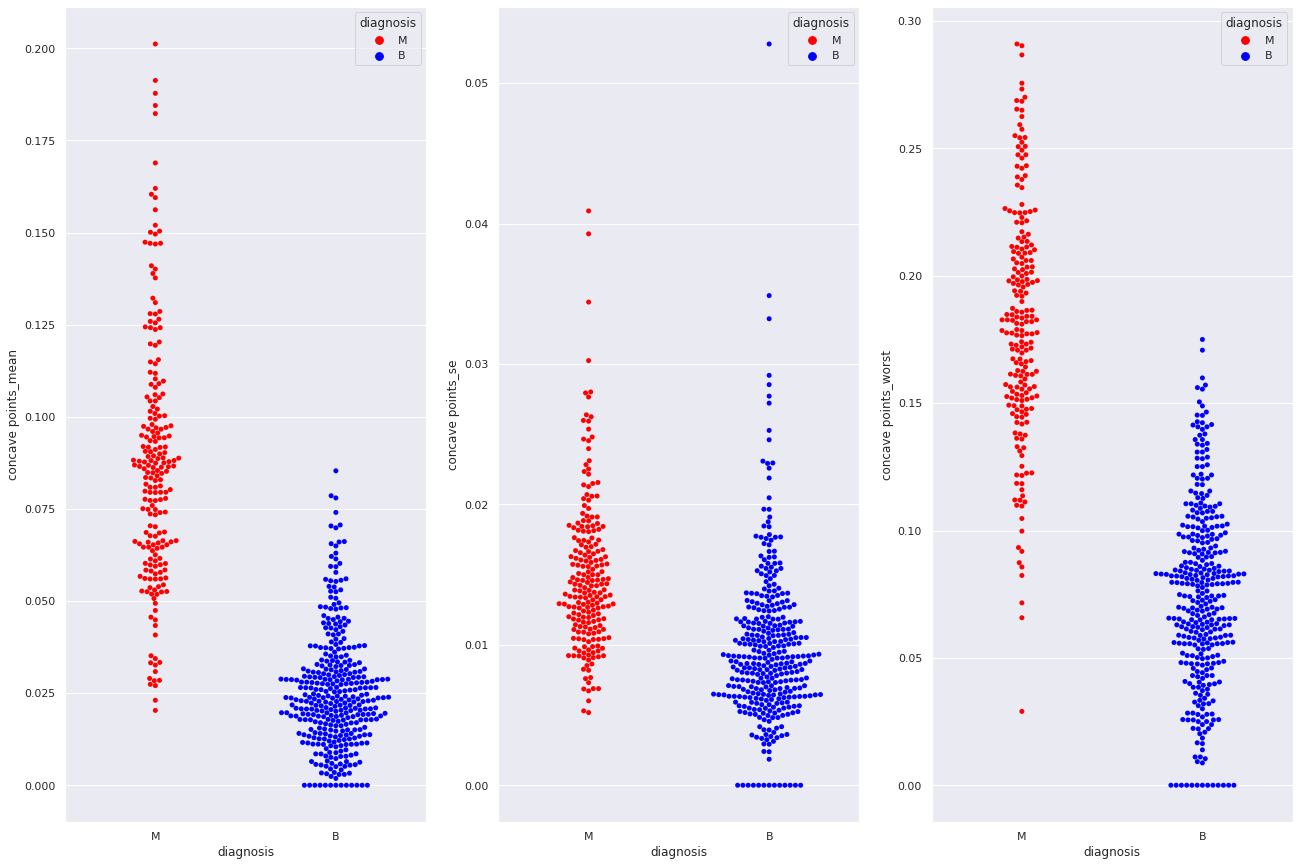

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='concave points_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='concave points_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='concave points_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

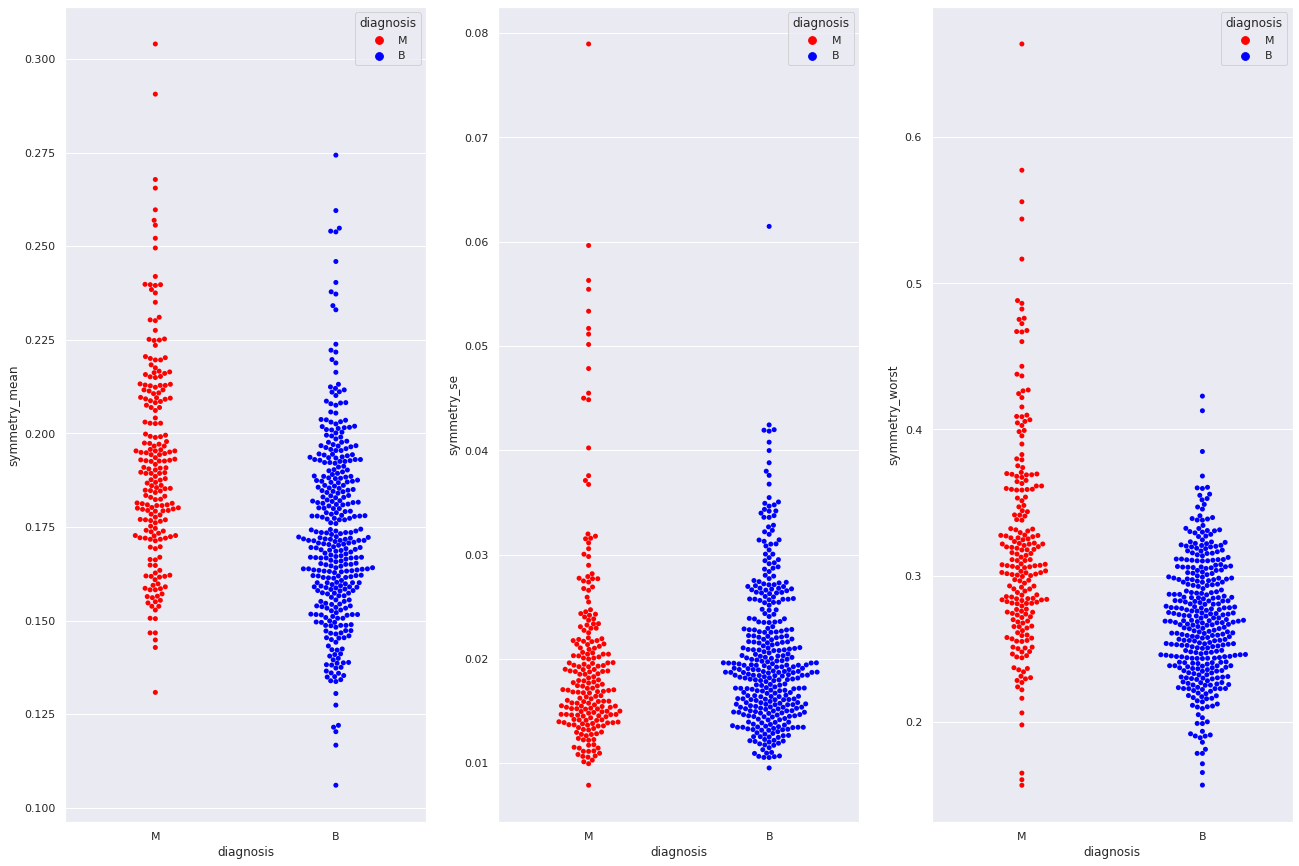

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='symmetry_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='symmetry_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='symmetry_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(22, 15))
sns.swarmplot(ax=axes[0], x='diagnosis', y='fractal_dimension_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.swarmplot(ax=axes[1], x='diagnosis', y='fractal_dimension_se', hue='diagnosis', data=cancer_df, palette=hue_colors2)
sns.swarmplot(ax=axes[2], x='diagnosis', y='fractal_dimension_worst', hue='diagnosis', data=cancer_df, palette=hue_colors2)

## Other plots

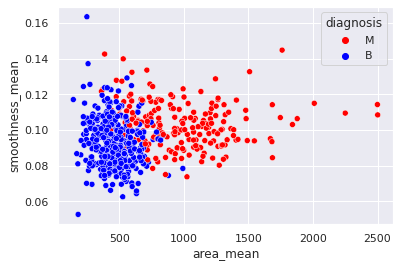

<Figure size 432x288 with 0 Axes>

In [101]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="area_mean", y="smoothness_mean", data=cancer_df, hue="diagnosis", palette=hue_colors2)

plt.figure(figsize=(6,4))
sns.lmplot(x='area_mean', y='smoothness_mean', hue='diagnosis', col='diagnosis', data=cancer_df, palette=hue_colors2)

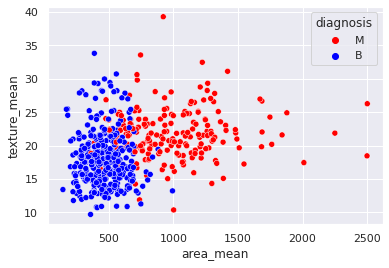

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="area_mean", y="texture_mean", data=cancer_df, hue="diagnosis", palette=hue_colors2)

plt.figure(figsize=(6,4))
sns.lmplot(x='area_mean', y='texture_mean', hue='diagnosis',col='diagnosis', data=cancer_df, palette=hue_colors2)


The scatterplot shows the mean area vs the smoothness. We can see whether the area and the smoothness are correlated with the diagnosis or not by performing a linear regression.

Also, we can use a joint plot to observe multiple distributions.

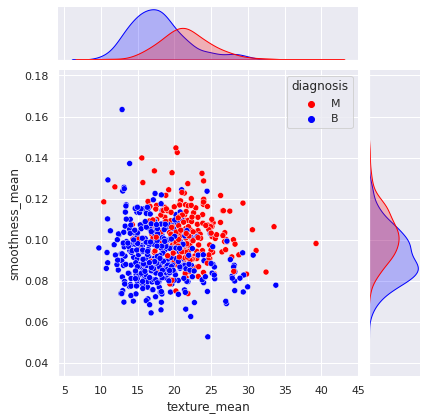

In [103]:
#fig, axes = plt.subplots(3, 1)
sns.jointplot(ax=axes[0], x='texture_mean', y='smoothness_mean', data=cancer_df, hue='diagnosis', palette=hue_colors2)
sns.jointplot(ax=axes[1], x='texture_mean', y='smoothness_mean', data=cancer_df, hue='diagnosis', kind="hist", palette=hue_colors2)

In [104]:
cancer_df.isna().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

# Machine Learning

In [105]:
X = cancer_df.iloc[:, 1:]
y = cancer_df['diagnosis'].astype('category')

In [106]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                                                                    ...   
842302                0.14710         0.2419                 0.07871  ...   
842517                0.07017         0.1812                 0.05667  ...   
84300903              0.12790         0.2069                 0.05999  ...   
84348301              0.10520         0.2597                 0.09744  ...   
84358402              0.10430         0.1809                 0.05883  ...   

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
842302           25.38          17.33           184.60      2019.0   
842517           24.99          23.41           158.80      1956.0   
84300903         23.57          25.53           152.50      1709.0   
84348301         14.91          26.50            98.87       567.7   
84358402         22.54          16.67           152.20      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [107]:
y

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']

In [108]:
y = y.replace(('M', 'B'), (1, 0))

In [109]:
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

## Supervised Learning

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#from sklearn.pipeline import Pipeline

from scipy.stats import randint


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Unscaled Models

#### $k$-Nearest Neighbors

In [112]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
cv_score_mean = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    #print(i, k)
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=4)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    cv_score_mean[i] = np.mean(cv_scores)
    train_accuracy[i] = knn.score(X_train, y_train)
    #test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
#plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, cv_score_mean, label = 'Mean of Cross Validation scores')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [113]:
max(cv_score_mean)

0.9345707070707071

In [114]:
cv_score_mean[3]

0.9345707070707071

In [115]:
knn_unscaled = KNeighborsClassifier(n_neighbors=4)
knn_unscaled.fit(X_train, y_train)
y_pred_knn_unscaled = knn_unscaled.predict(X_test)
knn_unscaled.score(X_test, y_test)

0.9298245614035088

#### Logistic Regression

In [116]:
c_space = np.logspace(-5, 2, 150)
param_grid_logreg = {'C': c_space, 'penalty': ['l1', 'l2', 'elasticnet']}

logreg = LogisticRegression()
logreg_unscaled = GridSearchCV(logreg, param_grid_logreg, cv=4)
logreg_unscaled.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.11424288e-05, 1.24153719e-05, 1.38337396e-05,
       1.54141458e-05, 1.71751022e-05, 1.91372352e-05, 2.13235280e-05,
       2.37595891e-05, 2.64739529e-05, 2.94984134e-05, 3.28683970e-05,
       3.66233771e-05, 4.08073370e-05, 4.54692846e-05, 5.06638264e-05,
       5.64518076e-05, 6.29010244e-05, 7.008701...
       1.03138977e+01, 1.14921870e+01, 1.28050875e+01, 1.42679775e+01,
       1.58979923e+01, 1.77142246e+01, 1.97379486e+01, 2.19928686e+01,
       2.45053971e+01, 2.73049642e+01, 3.04243618e+01, 3.39001283e+01,
       3.77729765e+01, 4.20882699e+01, 4.68965549e+01, 5.22541521e+01,
       5.82238167e+01, 6.48754729e+01, 7.22870335e+01, 8.05453121e+01,
       8.97470401e+01, 1.00000000e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [117]:
print("Accuracy: {}".format(logreg_unscaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(logreg_unscaled.best_params_))

Accuracy: 0.935672514619883
Tuned Model Parameters: {'C': 10.313897683787221, 'penalty': 'l2'}


In [118]:
y_pred_logreg_unscaled = logreg_unscaled.predict(X_test)
logreg_unscaled.score(X_test, y_test)

0.935672514619883

#### Decision Tree

In [119]:
from sklearn.tree import plot_tree

In [120]:
param_grid_dt = {"max_depth": [3, 4, 5, 6, 7, 8, None], "max_features": np.arange(1, 30), 
                 "min_samples_leaf": [0.04, 0.06, 0.08, 0.1, 1, 2, 4, 6, 8], "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_grid_dt, cv=4, scoring='accuracy', n_jobs=-1)

# Fit it to the data
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, None],
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1, 1, 2, 4, 6,
                                              8]},
             scoring='accuracy')

In [121]:
print("Accuracy: {}".format(tree_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(tree_cv.best_params_))

Accuracy: 0.9532163742690059
Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 11, 'min_samples_leaf': 6}


In [122]:
tree_unscaled = tree_cv.best_estimator_
y_pred_tree_unscaled = tree_unscaled.predict(X_test)
tree_unscaled.score(X_test, y_test)

0.9532163742690059

[Text(0.6071428571428571, 0.9, 'perimeter_worst <= 112.8\nentropy = 0.952\nsamples = 398\nvalue = [250, 148]\nclass = metastatic'),
 Text(0.35714285714285715, 0.7, 'concave points_worst <= 0.181\nentropy = 0.377\nsamples = 260\nvalue = [241, 19]\nclass = metastatic'),
 Text(0.2857142857142857, 0.5, 'texture_mean <= 21.315\nentropy = 0.259\nsamples = 252\nvalue = [241, 11]\nclass = metastatic'),
 Text(0.14285714285714285, 0.3, 'radius_se <= 0.425\nentropy = 0.081\nsamples = 198\nvalue = [196, 2]\nclass = metastatic'),
 Text(0.07142857142857142, 0.1, 'entropy = 0.0\nsamples = 182\nvalue = [182, 0]\nclass = metastatic'),
 Text(0.21428571428571427, 0.1, 'entropy = 0.544\nsamples = 16\nvalue = [14, 2]\nclass = metastatic'),
 Text(0.42857142857142855, 0.3, 'concave points_mean <= 0.045\nentropy = 0.65\nsamples = 54\nvalue = [45, 9]\nclass = metastatic'),
 Text(0.35714285714285715, 0.1, 'entropy = 0.414\nsamples = 48\nvalue = [44, 4]\nclass = metastatic'),
 Text(0.5, 0.1, 'entropy = 0.65\nsam

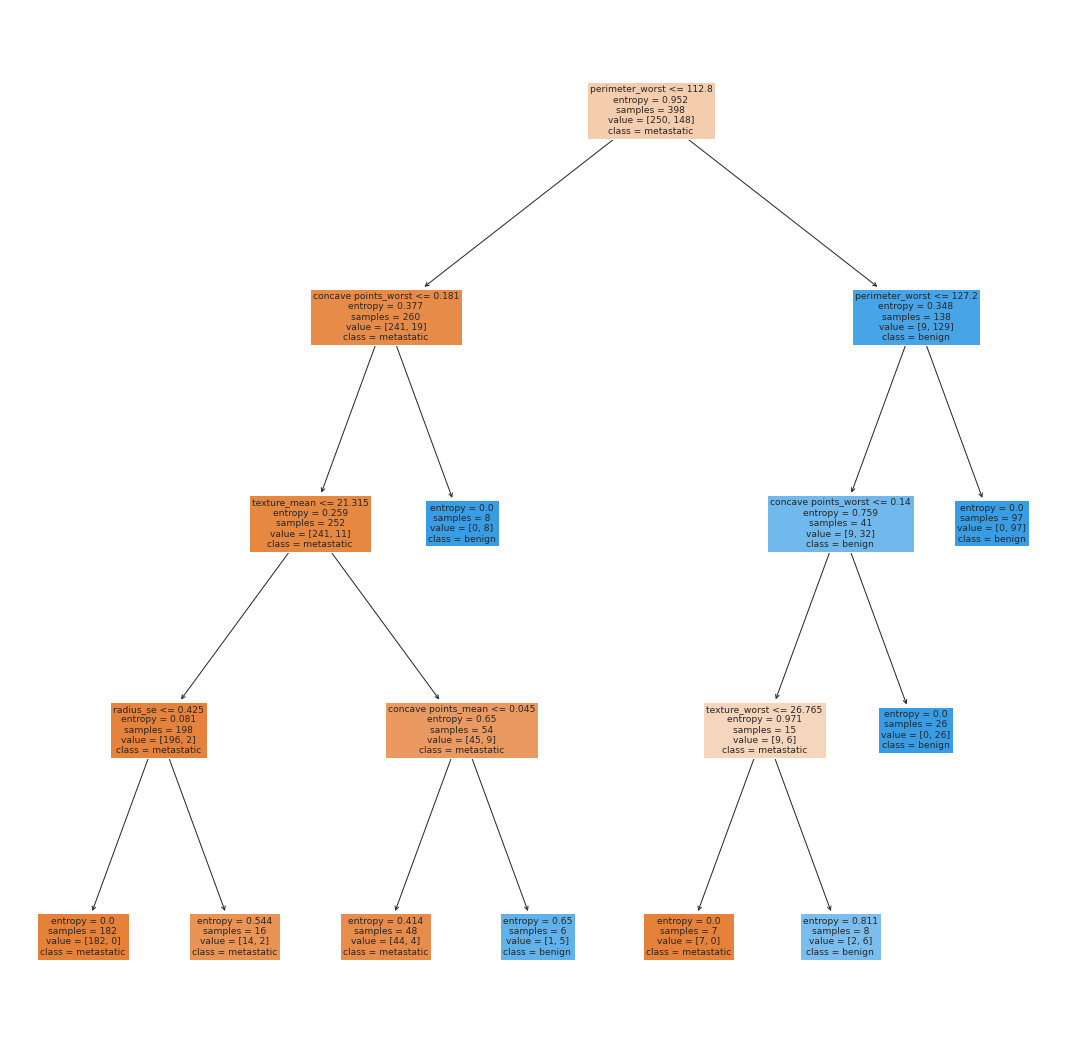

In [123]:
fig=plt.figure(figsize=(19,19))
plot_tree(tree_unscaled, feature_names=X_train.columns.values, class_names = ['metastatic','benign'], filled=True)


#### Random Forest

In [124]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid_rf = dict(max_depth=max_depth, n_estimators=n_estimators)
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
#{'n_estimators':[100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]}
rf_cv = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv = 4)
rf_cv.fit(X_train, y_train)
#random_forest_unscaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=[2, 8, 16],
                                              n_estimators=[64, 128, 256]),
             param_grid={'max_depth': [2, 8, 16],
                         'n_estimators': [64, 128, 256]})

In [125]:
print("Accuracy: {}".format(rf_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Accuracy: 0.9707602339181286
Tuned Model Parameters: {'max_depth': 16, 'n_estimators': 128}


In [126]:
random_forest_unscaled = rf_cv.best_estimator_
y_pred_random_forest_unscaled = tree_unscaled.predict(X_test)
random_forest_unscaled.score(X_test, y_test)

0.9707602339181286

#### Support Vector Machine

In [127]:
param_grid_SVM = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svc_cv = GridSearchCV(SVC(),param_grid_SVM, refit = True, verbose=2)
svc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   4.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   2.3s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   4.1s
[CV] END ......................C=1, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [128]:
print("Accuracy: {}".format(svc_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(svc_cv.best_params_))

Accuracy: 0.9415204678362573
Tuned Model Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [129]:
SVC_unscaled = svc_cv.best_estimator_
y_pred_SVC_unscaled = SVC_unscaled.predict(X_test)
SVC_unscaled.score(X_test, y_test)

0.9415204678362573

#### MLP Classifier

In [130]:
mlp = MLPClassifier(max_iter=100)
param_grid_MLP = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp_cv = GridSearchCV(mlp, param_grid_MLP, n_jobs=-1, cv=5)
mlp_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [131]:
print("Accuracy: {}".format(mlp_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(mlp_cv.best_params_))

Accuracy: 0.8830409356725146
Tuned Model Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [132]:
MLP_unscaled = mlp_cv.best_estimator_
y_pred_MLP_unscaled = MLP_unscaled.predict(X_test)
MLP_unscaled.score(X_test, y_test)

0.8830409356725146

#### Overall Evaluation for unscaled data 

In [133]:
models_unscaled = [["KNeighborsClassifier", y_pred_knn_unscaled], ["LogisticRegression", y_pred_logreg_unscaled],
          ["DecisionTreeClassifier", y_pred_tree_unscaled], ["RandomForestClassifier", y_pred_random_forest_unscaled],
          ['SVM', y_pred_SVC_unscaled], ['MLPClassifier', y_pred_MLP_unscaled]]

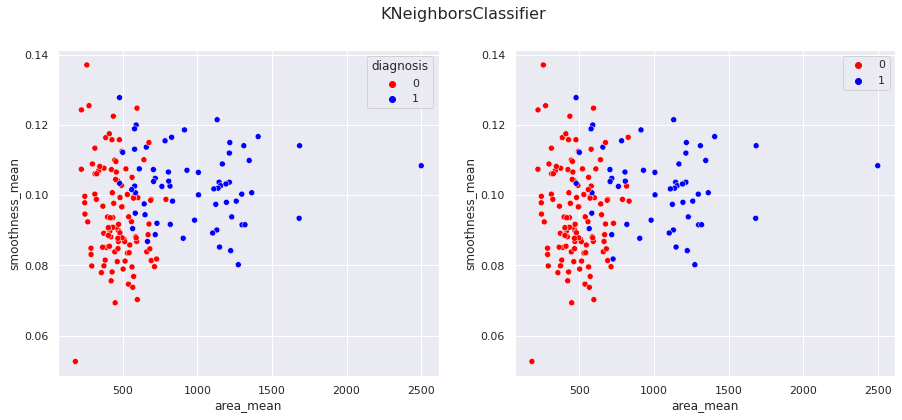

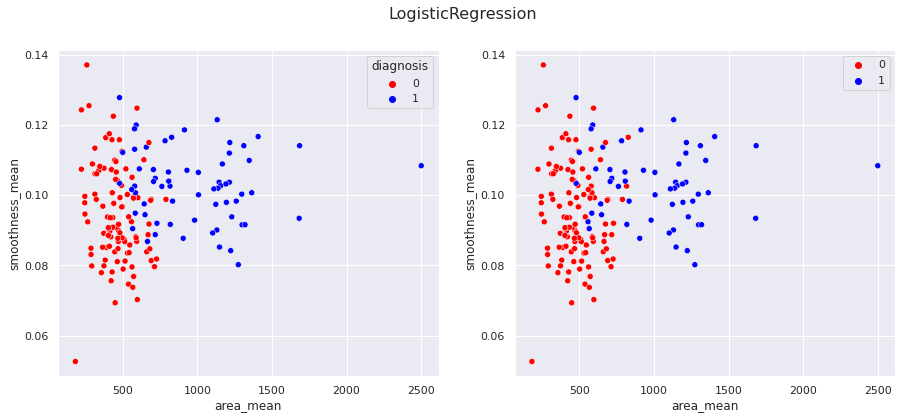

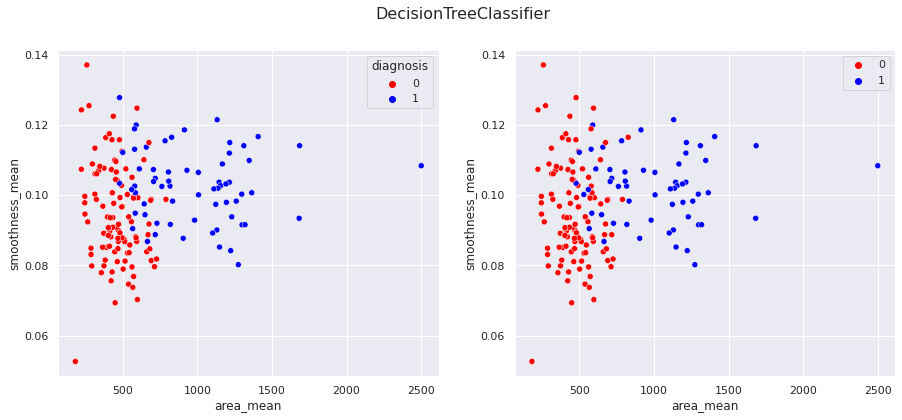

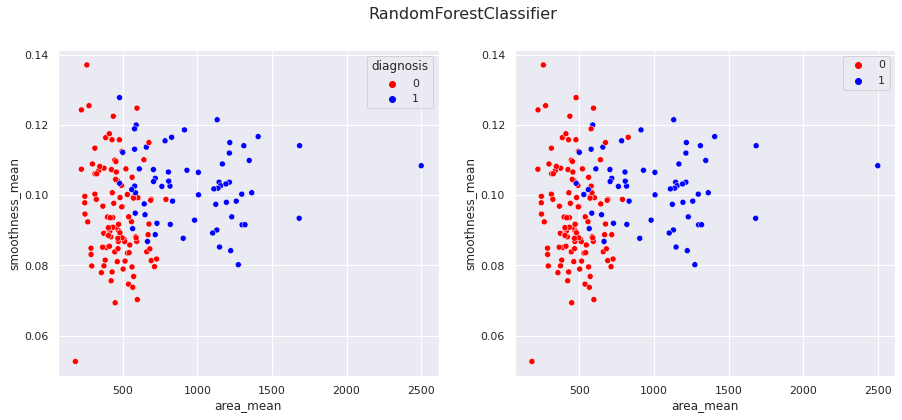

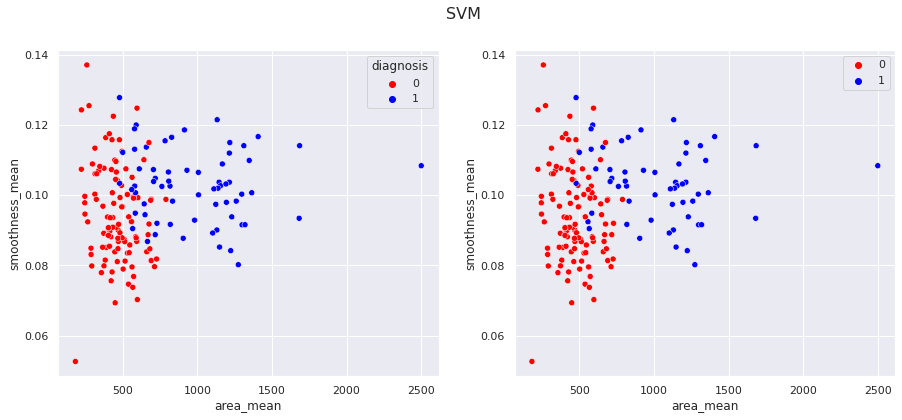

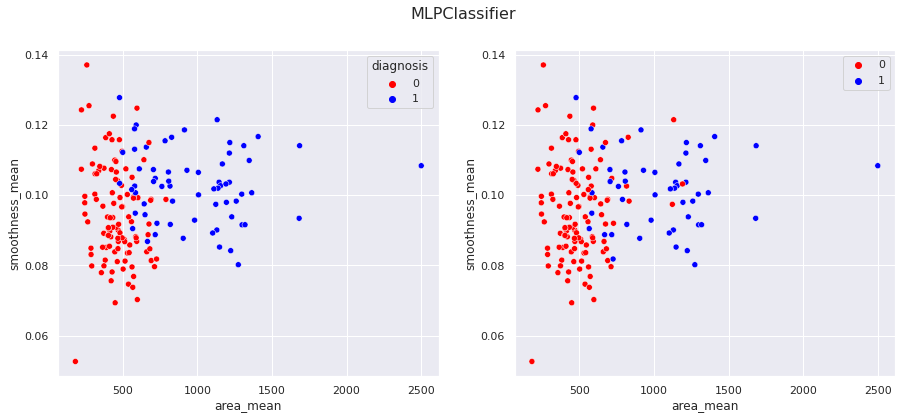

In [134]:
accuracy_score_unscaled = []
classification_reports_unscaled = []
confusion_matrices_unscaled = []
for model in models_unscaled:
    prediction = model[1]
    accuracy_score_unscaled.append([model[0], accuracy_score(prediction, y_test)])
    classification_reports_unscaled.append([model[0], classification_report(y_test, prediction)])
    confusion_matrices_unscaled.append([model[0], confusion_matrix(y_test, prediction)])
    #cross_val_unscaled.append(mod
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(ax=axes[0], x=X_test["area_mean"], y=X_test["smoothness_mean"], hue=y_test, palette=hue_colors2)
    sns.scatterplot(ax=axes[1], x=X_test["area_mean"], y=X_test["smoothness_mean"], hue=prediction, palette=hue_colors2)
    fig.suptitle(model[0], fontsize=16)

main_score = pd.DataFrame(accuracy_score_unscaled)
main_score.columns = ["Model", "Score"]

In [135]:
for model, report in classification_reports_unscaled:
  print(model)
  print(report)

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.98      0.83      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

LogisticRegression
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       107
           1       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted av

In [136]:
for model, matrix in confusion_matrices_unscaled:
  print(model)
  print(matrix)

KNeighborsClassifier
[[106   1]
 [ 11  53]]
LogisticRegression
[[105   2]
 [  9  55]]
DecisionTreeClassifier
[[106   1]
 [  7  57]]
RandomForestClassifier
[[106   1]
 [  7  57]]
SVM
[[105   2]
 [  8  56]]
MLPClassifier
[[104   3]
 [ 17  47]]


### Scaled Models

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### $k$-Nearest Neighbors

In [138]:
steps_knn = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
        
pipeline_knn = Pipeline(steps_knn)
param_grid_knn = {'knn__n_neighbors': np.arange(1, 50)}
knn_scaled = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=4)
knn_scaled.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [139]:
print("Accuracy: {}".format(knn_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(knn_scaled.best_params_))

Accuracy: 0.9590643274853801
Tuned Model Parameters: {'knn__n_neighbors': 3}


In [140]:
y_pred_knn_scaled = knn_scaled.predict(X_test)
knn_scaled.score(X_test, y_test)

0.9590643274853801

#### Logistic Regression

In [141]:
steps_logreg = [('scaler', StandardScaler()), ('logreg', LogisticRegression())]
pipeline_logreg = Pipeline(steps_logreg)
param_grid_logreg = {'logreg__C': c_space, 'logreg__penalty': ['l1', 'l2', 'elasticnet']}
logreg_scaled = GridSearchCV(pipeline_logreg, param_grid=param_grid_logreg, cv=4)
logreg_scaled.fit(X_train, y_train)

print("Accuracy: {}".format(logreg_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(logreg_scaled.best_params_))

y_pred_logreg_scaled = logreg_scaled.predict(X_test)
logreg_scaled.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.9707602339181286
Tuned Model Parameters: {'logreg__C': 3.8958661446875604, 'logreg__penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


0.9707602339181286

#### Decision Tree

In [142]:
steps_tree = [('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())]
param_grid_tree = {"dt__max_depth": [3, 4, 5, 6, 7, 8, None], "dt__max_features": np.arange(1, 30), 
                 "dt__min_samples_leaf": [0.04, 0.06, 0.08, 0.1, 1, 2, 4, 6, 8], "dt__criterion": ["gini", "entropy"]}
pipeline_tree = Pipeline(steps_tree)

tree_scaled = GridSearchCV(pipeline_tree, param_grid=param_grid_tree, cv=4)
tree_scaled.fit(X_train, y_train)

print("Accuracy: {}".format(tree_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(tree_scaled.best_params_))

y_pred_tree_scaled = tree_scaled.predict(X_test)
tree_scaled.score(X_test, y_test)

Accuracy: 0.9064327485380117
Tuned Model Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__max_features': 8, 'dt__min_samples_leaf': 1}


0.9064327485380117

#### Random Forest

In [144]:
steps_random_forest = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]
param_grid_rf = {"rf__max_depth": [2, 8, 16], "rf__n_estimators": [64, 128, 256]}
pipeline_random_forest = Pipeline(steps_random_forest)

random_forest_scaled = GridSearchCV(pipeline_random_forest, param_grid=param_grid_rf, cv=4)
random_forest_scaled.fit(X_train, y_train)

print("Accuracy: {}".format(random_forest_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(random_forest_scaled.best_params_))

y_pred_random_forest_scaled = random_forest_scaled.predict(X_test)
random_forest_scaled.score(X_test, y_test)

Accuracy: 0.9707602339181286
Tuned Model Parameters: {'rf__max_depth': 16, 'rf__n_estimators': 64}


0.9707602339181286

#### Support Vector Machine

In [145]:
steps_SVC = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline_SVC = Pipeline(steps_SVC)
param_grid_SVM = {'SVM__C':[1,10,100,1000], 'SVM__gamma':[1,0.1,0.001,0.0001], 'SVM__kernel':['linear','rbf']}
#param_grid_SVM = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
SVC_scaled = GridSearchCV(pipeline_SVC, param_grid=param_grid_SVM, cv=4)
SVC_scaled.fit(X_train, y_train)

y_pred_SVC_scaled = SVC_scaled.predict(X_test)

print("Accuracy: {}".format(SVC_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(SVC_scaled.best_params_))

Accuracy: 0.9649122807017544
Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}


#### MPL Classifier

In [146]:
steps_MLP = [('scaler', StandardScaler()), ('MLP', MLPClassifier(max_iter=100))]
pipeline_MLP = Pipeline(steps_MLP)
param_grid_MLP = {
    'MLP__hidden_layer_sizes': [(10,30,10),(20,)],
    'MLP__activation': ['tanh', 'relu'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.0001, 0.05],
    'MLP__learning_rate': ['constant','adaptive'],
}

MLP_scaled = GridSearchCV(pipeline_MLP, param_grid=param_grid_MLP, cv=4)
MLP_scaled.fit(X_train, y_train)

y_pred_MLP_scaled = MLP_scaled.predict(X_test)

print("Accuracy: {}".format(MLP_scaled.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(MLP_scaled.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Accuracy: 0.9824561403508771
Tuned Model Parameters: {'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (20,), 'MLP__learning_rate': 'constant', 'MLP__solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Overall Evaluation for scaled data 

In [147]:
models_scaled = [["KNeighborsClassifier_scaled", y_pred_knn_scaled], ["LogisticRegression_scaled", y_pred_logreg_scaled],
          ["DecisionTreeClassifier_scaled", y_pred_tree_scaled], ["RandomForestClassifier_scaled", y_pred_random_forest_scaled],
          ['SVM_scaled', y_pred_SVC_unscaled], ['MLPClassifier_scaled', y_pred_MLP_scaled]]

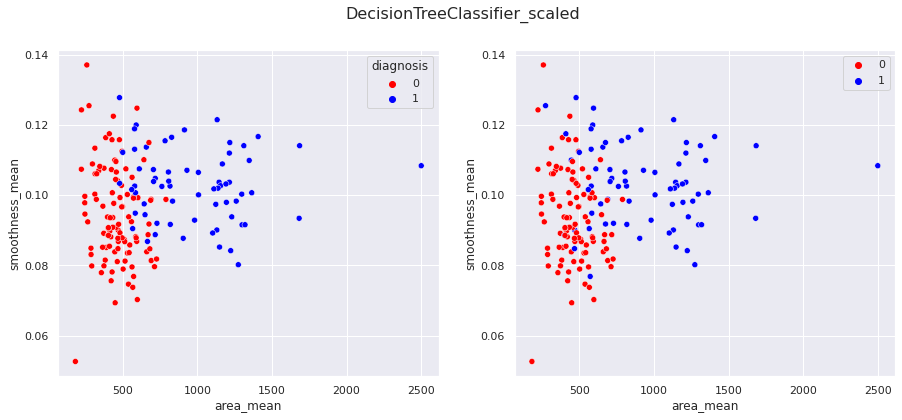

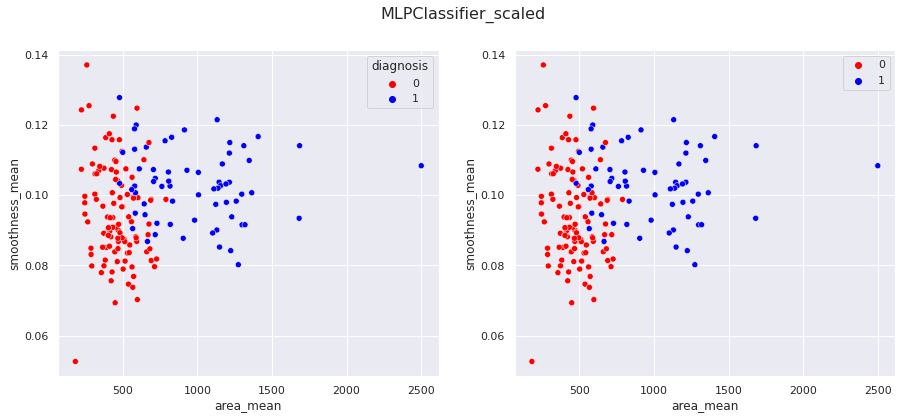

In [148]:
accuracy_score_scaled = []
classification_reports_scaled = []
confusion_matrices_scaled = []
#cross_val_scaled=[]
for model in models_scaled:
    #classifier0 = model[1]
    #classifier = model[1]
    #classifier.fit(X_train_scaled, y_train)
    prediction = model[1]
    accuracy_score_scaled.append([model[0], accuracy_score(prediction, y_test)])
    classification_reports_scaled.append([model[0], classification_report(y_test, prediction)])
    confusion_matrices_scaled.append([model[0], confusion_matrix(y_test, prediction)])
    #cross_val_scaled.append(model[0], cross_val_score(classifier0, X_scaled, y, cv=5))
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.scatterplot(ax=axes[0], x=X_test["area_mean"], y=X_test["smoothness_mean"], hue=y_test, palette=hue_colors2)
    sns.scatterplot(ax=axes[1], x=X_test["area_mean"], y=X_test["smoothness_mean"], hue=prediction, palette=hue_colors2)
    fig.suptitle(model[0], fontsize=16)
main_score_scaled = pd.DataFrame(accuracy_score_scaled)
main_score_scaled.columns = ["Model", "Score"]

In [149]:
main_scores = main_score.copy()
main_scores['Model_scaled'] = main_score_scaled['Model']
main_scores['Score_scaled'] = main_score_scaled['Score']

In [150]:
main_scores

Model     Score                   Model_scaled  \
0    KNeighborsClassifier  0.929825    KNeighborsClassifier_scaled   
1      LogisticRegression  0.935673      LogisticRegression_scaled   
2  DecisionTreeClassifier  0.953216  DecisionTreeClassifier_scaled   
3  RandomForestClassifier  0.953216  RandomForestClassifier_scaled   
4                     SVM  0.941520                     SVM_scaled   
5           MLPClassifier  0.883041           MLPClassifier_scaled   

   Score_scaled  
0      0.959064  
1      0.970760  
2      0.906433  
3      0.970760  
4      0.941520  
5      0.982456

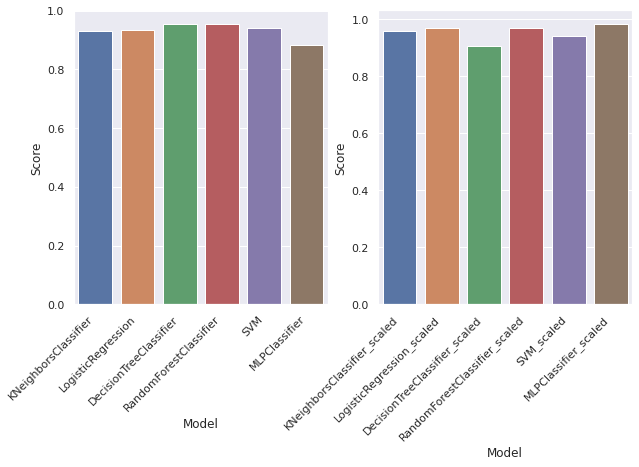

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(ax=axes[0], x='Model', y='Score', data=main_score)
sns.barplot(ax=axes[1], x='Model', y='Score', data=main_score_scaled)
fig.autofmt_xdate(rotation=45)

In [152]:
for model, report in classification_reports_scaled:
  print(model)
  print(report)

KNeighborsClassifier_scaled
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

LogisticRegression_scaled
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

DecisionTreeClassifier_scaled
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.84      0.92      0.88        64

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90 

In [153]:
for model, matrix in confusion_matrices_scaled:
  print(model)
  print(matrix)

KNeighborsClassifier_scaled
[[107   0]
 [  7  57]]
LogisticRegression_scaled
[[106   1]
 [  4  60]]
DecisionTreeClassifier_scaled
[[96 11]
 [ 5 59]]
RandomForestClassifier_scaled
[[107   0]
 [  5  59]]
SVM_scaled
[[105   2]
 [  8  56]]
MLPClassifier_scaled
[[107   0]
 [  3  61]]


In [154]:
#for model, cross_val in classification_reports_scaled:
#  print(model)
#  print(report)

## Unsupervised Learning

### $k$-Means

In [155]:
from sklearn.cluster import KMeans

In [156]:
kmean_unscaled = KMeans(n_clusters=2)
kmean_unscaled.fit(X_train)
labels = kmean_unscaled.predict(X)
df_unscaled = pd.DataFrame({'labels':labels, 'diagnosis':y})
print(pd.crosstab(labels, y))

diagnosis    0    1
row_0              
0          356   82
1            1  130


In [157]:
X_unscaled_plot = X.copy()
X_unscaled_plot['labels']=labels

In [158]:
accuracy_score(labels, y)

0.8541300527240774

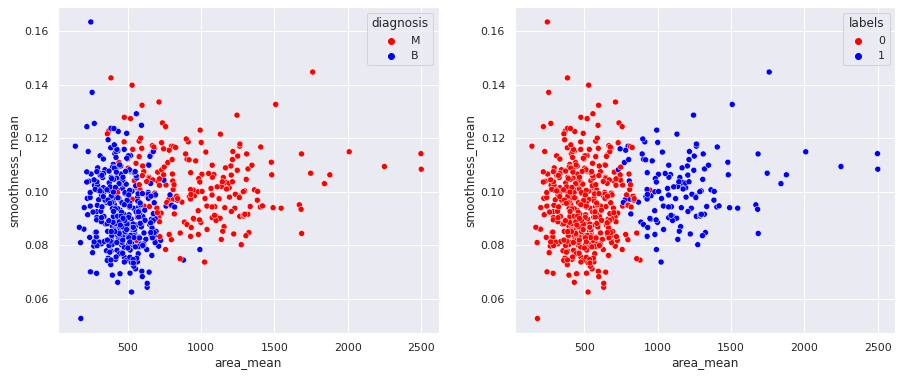

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(ax=axes[0], x="area_mean", y="smoothness_mean", data=cancer_df, hue="diagnosis", palette=hue_colors2)
sns.scatterplot(ax=axes[1], x="area_mean", y="smoothness_mean", data=X_unscaled_plot, hue="labels", palette=hue_colors2)
#sns.barplot(ax=axes[0], x='Model', y='Score', data=main_score)
#sns.barplot(ax=axes[1], x='Model', y='Score', data=main_score_scaled)

In [160]:
scaler3 = StandardScaler()

In [161]:
from sklearn.pipeline import make_pipeline

In [162]:
kmean_scaled = KMeans(n_clusters=2)
pipeline = make_pipeline(scaler3, kmean_scaled)
pipeline.fit(X)
labels = pipeline.predict(X)
df_scaled = pd.DataFrame({'labels':labels, 'diagnosis': y})
print(pd.crosstab(df_scaled['labels'], df_scaled['diagnosis']))

diagnosis    0    1
labels             
0           18  176
1          339   36


In [163]:
X_scaled_plot = X.copy()
X_scaled_plot['labels']=labels

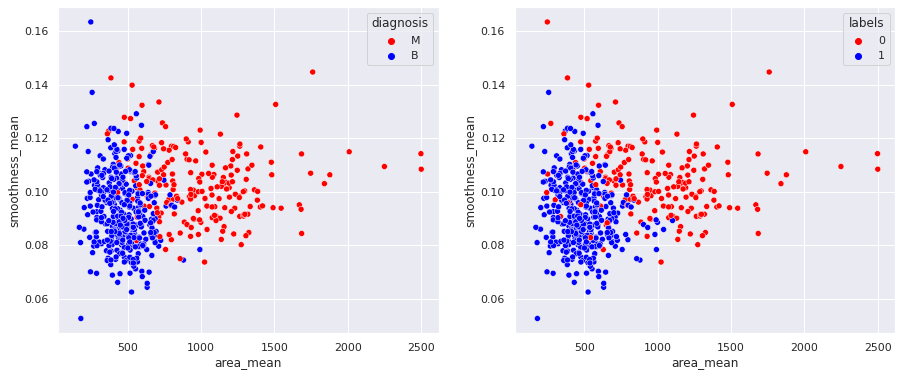

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(ax=axes[0], x="area_mean", y="smoothness_mean", data=cancer_df, hue="diagnosis", palette=hue_colors2)
sns.scatterplot(ax=axes[1], x="area_mean", y="smoothness_mean", data=X_scaled_plot, hue="labels", palette=hue_colors2)

### $t$-distributed Stochastic Neighbor Embedding ($t$SNE)

In [165]:
from sklearn.manifold import TSNE

In [166]:
y_color = cancer_df['diagnosis'].map(hue_colors1)

In [167]:
y_color

id
842302       red
842517       red
84300903     red
84348301     red
84358402     red
            ... 
926424       red
926682       red
926954       red
927241       red
92751       blue
Name: diagnosis, Length: 569, dtype: object

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


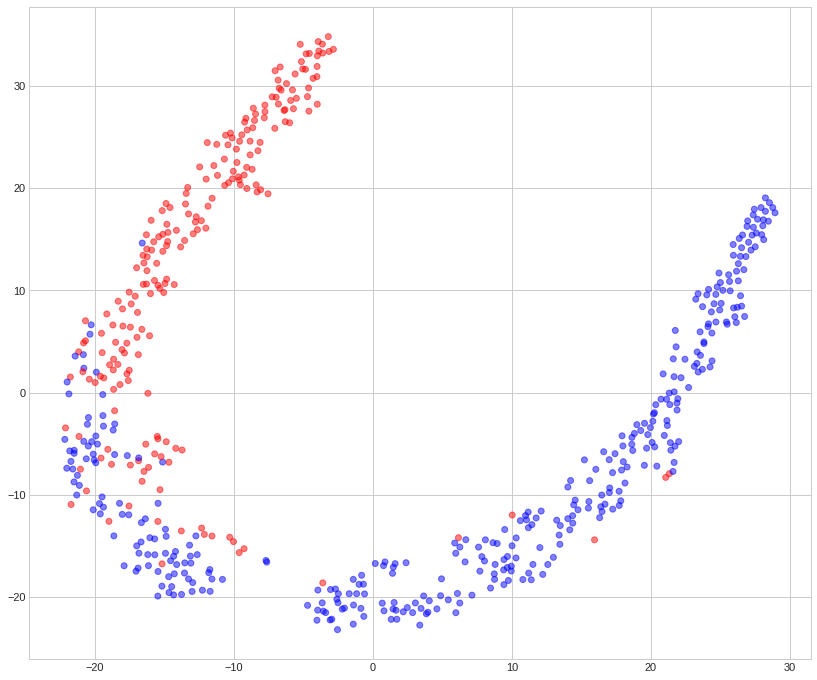

In [168]:
tSNE = TSNE(learning_rate=60)

X_tSNE = tSNE.fit_transform(X)

xs = X_tSNE[:, 0]
ys = X_tSNE[:, 1]

# Scatter plot, coloring by variety_numbers
plt.style.use('seaborn-whitegrid')
plt.scatter(xs, ys, c=y_color, alpha=0.5)
#plt.show()

### Principal Component Analysis (PCA)

In [169]:
from sklearn.decomposition import PCA
pca_unscaled = PCA()
X_pca_unscaled = pca_unscaled.fit_transform(X)

(-1099.6583258275843, 4103.694071126865, -742.0899215972687, 810.1785770364647)

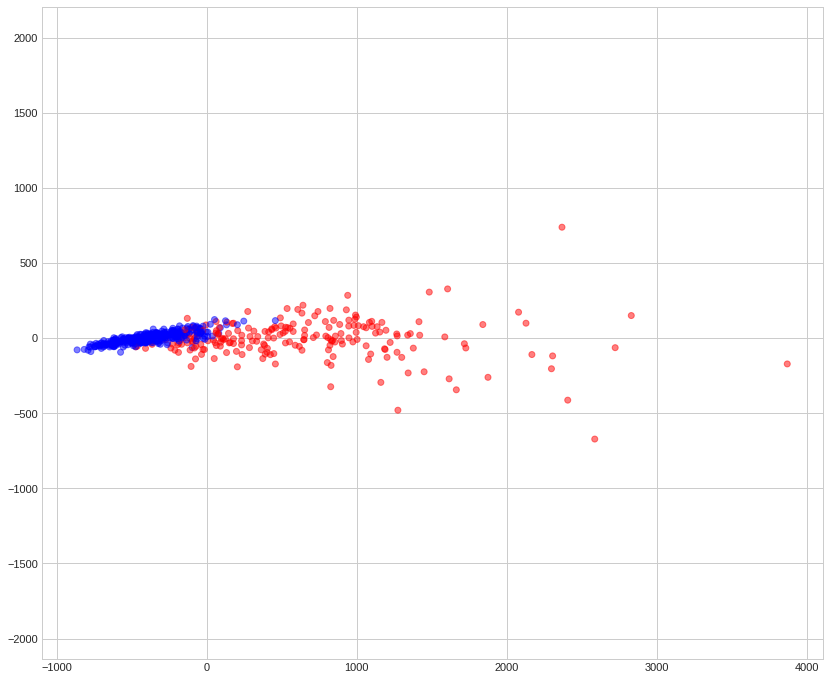

In [170]:
xs = X_pca_unscaled[:, 0]
ys = X_pca_unscaled[:, 1]
plt.scatter(xs, ys, c=y_color, alpha=0.5)
plt.axis('equal')
#plt.show()

In [172]:
X_pca_features_unscaled = range(pca_unscaled.n_components_)
fig = plt.figure(figsize =(15, 5))
plt.bar(X_pca_features_unscaled, pca_unscaled.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(X_pca_features_unscaled)

([<matplotlib.axis.XTick at 0x7f3c5ab88b90>,
 <a list of 30 Text major ticklabel objects>)

In [173]:
sns.set(rc = {'figure.figsize':(6, 6)})
plt.plot(np.cumsum(pca_unscaled.explained_variance_ratio_),'ro-')
plt.grid()

In [174]:
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X)

In [175]:
pca_scaled = PCA()
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

(-1099.6583258275843, 4103.694071126865, -742.0899215972687, 810.1785770364647)

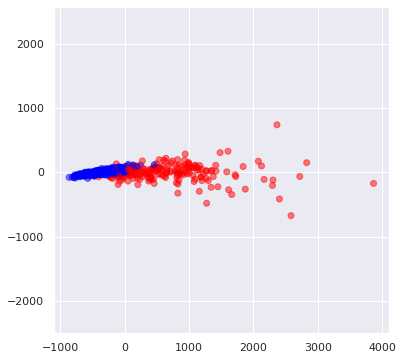

In [176]:
xs = X_pca_unscaled[:, 0]
ys = X_pca_unscaled[:, 1]
plt.scatter(xs, ys, c=y_color, alpha=0.5)
plt.axis('equal')

In [177]:
X_pca_features_scaled = range(pca_scaled.n_components_)
fig = plt.figure(figsize =(15, 5))
plt.bar(X_pca_features_scaled, pca_scaled.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(X_pca_features_scaled)

([<matplotlib.axis.XTick at 0x7f3c554add10>,
 <a list of 30 Text major ticklabel objects>)

In [178]:
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_),'ro-')
plt.grid()

# Best Model

In [179]:
cancer_df.tail(8)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                       
925311         B        11.20         29.37           70.67      386.0   
925622         M        15.22         30.62          103.40      716.9   
926125         M        20.92         25.09          143.00     1347.0   
926424         M        21.56         22.39          142.00     1479.0   
926682         M        20.13         28.25          131.20     1261.0   
926954         M        16.60         28.08          108.30      858.1   
927241         M        20.60         29.33          140.10     1265.0   
92751          B         7.76         24.54           47.92      181.0   

        smoothness_mean  compactness_mean  concavity_mean  \
id                                                          
925311          0.07449           0.03558         0.00000   
925622          0.10480           0.20870         0.25500   
926125          0.10990           0.22360         0.31740   
926424          0.11100           0.11590         0.24390   
926682          0.09780           0.10340         0.14400   
926954          0.08455           0.10230         0.09251   
927241          0.11780           0.27700         0.35140   
92751           0.05263           0.04362         0.00000   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
id                                          ...                                
925311              0.00000         0.1060  ...        11.920          38.30   
925622              0.09429         0.2128  ...        17.520          42.79   
926125              0.14740         0.2149  ...        24.290          29.41   
926424              0.13890         0.1726  ...        25.450          26.40   
926682              0.09791         0.1752  ...        23.690          38.25   
926954              0.05302         0.1590  ...        18.980          34.12   
927241              0.15200         0.2397  ...        25.740          39.42   
92751               0.00000         0.1587  ...         9.456          30.37   

        perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                         
925311            75.19       439.6           0.09267            0.05494   
925622           128.70       915.0           0.14170            0.79170   
926125           179.10      1819.0           0.14070            0.41860   
926424           166.10      2027.0           0.14100            0.21130   
926682           155.00      1731.0           0.11660            0.19220   
926954           126.70      1124.0           0.11390            0.30940   
927241           184.60      1821.0           0.16500            0.86810   
92751             59.16       268.6           0.08996            0.06444   

        concavity_worst  concave points_worst  symmetry_worst  \
id                                                              
925311           0.0000                0.0000          0.1566   
925622           1.1700                0.2356          0.4089   
926125           0.6599                0.2542          0.2929   
926424           0.4107                0.2216          0.2060   
926682           0.3215                0.1628          0.2572   
926954           0.3403                0.1418          0.2218   
927241           0.9387                0.2650          0.4087   
92751            0.0000                0.0000          0.2871   

        fractal_dimension_worst  
id                               
925311                  0.05905  
925622                  0.14090  
926125                  0.09873  
926424                  0.07115  
926682                  0.06637  
926954                  0.07820  
927241                  0.12400  
92751                   0.07039  

[8 rows x 31 columns]

In [180]:
MLP_scaled.predict(np.array(cancer_df.iloc[-1, 1:]).reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [181]:
MLP_scaled.predict(np.array(cancer_df.iloc[-2, 1:]).reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [182]:
MLP_scaled.predict(np.array(cancer_df.iloc[-6, 1:]).reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])